<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Открытие-файлов-и-их-изучение" data-toc-modified-id="Открытие-файлов-и-их-изучение-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Открытие файлов и их изучение</a></span></li><li><span><a href="#Проверка-рассчёта-эффективности-обогащения" data-toc-modified-id="Проверка-рассчёта-эффективности-обогащения-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка рассчёта эффективности обогащения</a></span></li><li><span><a href="#Проверка-разницы-в-признаках-тренировачной-и-тестовой-выборок" data-toc-modified-id="Проверка-разницы-в-признаках-тренировачной-и-тестовой-выборок-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка разницы в признаках тренировачной и тестовой выборок</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-сырьё,-в-черновой-и-финальный-концентраты." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-сырьё,-в-черновой-и-финальный-концентраты.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях: сырьё, в черновой и финальный концентраты.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных
### Импорт библиотек
Импортирую необходимые библиотеки для работы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from tqdm.notebook import tqdm

### Открытие файлов и их изучение
Открываю файлы и вывожу основную информацию

In [2]:
data = {}
for name in ['train', 'test', 'full']:
    try:
        data[name] = pd.read_csv(f'/datasets/gold_recovery_{name}_new.csv')
    except:
        data[name] = pd.read_csv(f'https://code.s3.yandex.net/datasets/gold_recovery_{name}_new.csv')
    data[name].info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Предоставленные данные уже разиты на обучающую и тестовую выборку. Также есть таблица со всеми данными. У данных с тестовой выборкой 53 столбца в то время, как у таблицы со всеми данными и у тренировачных данных по 87 столбцов. Вдобавок ко всему в тестовой выборке нет целевых признаков.

### Проверка рассчёта эффективности обогащения
Далее я проверяю: правильно ли рассчитана эффективность обогащения по формуле, представленной ниже.

<img src="https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg">

Для этой формулы я пишу функцию

In [3]:
def recovery(row):
    c = row['rougher.output.concentrate_au']
    f = row['rougher.input.feed_au']
    t = row['rougher.output.tail_au']
    return ((c * (f - t)) / (f * (c - t))) * 100

Затем я нахожу значения MAE

In [4]:
mean_absolute_error(data['train']['rougher.output.recovery'], data['train'].apply(recovery, axis=1))

9.73512347450521e-15

Значение MAE достаточно низкое, чтобы не переживать о неправильных расчётах

### Проверка разницы в признаках тренировачной и тестовой выборок
Ниже перечисляются столбцы, которые есть в полных данных, но по каким-то причинам отсутствуют в тестовой выборке

In [5]:
set(data['full'].columns) - set(data['test'].columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Если проверить обратное выражение, то результатом будет пустое множество, а значит в тренировачной выборке есть все столбцы из тестовой выборки

In [6]:
set(data['full'].columns) - set(data['train'].columns)

set()

В тестовых данных отстутствуют столбцы с типом параметра `output` и `calculation`. Возможно, их нет в тестовой выборке, так как с помощью расчётов их можно получить из имеющихся данных

### Предобработка данных
Проверяю количество дубликатов в данных

In [7]:
data['full'].duplicated().sum()

0

Объединяю все данные с обучайющей выборкой

In [8]:
full_data = pd.concat([data['full'], data['train']])

Снова проверяю количество дубликатов

In [9]:
full_data.duplicated().sum()

11057

Как и ожидалось, данные повторяются. Проверю количество строк в обучающей выборке

In [10]:
data['train'].shape[0]

14149

Получились разные ответы, а значит в общих данных присутствуют не все данные с обучающей выборки. Удаляю дубликаты и срасываю индексы

In [11]:
full_data = full_data.drop_duplicates().reset_index(drop=True)

В тестовой выборке, как уже было выяснено ранее, меньше столбцов, чем у остальных данных. Сопоставляя похожие строки в полном датафрейме, составляю тестовую выборку со всеми столбцами

In [12]:
# Для этого делаю полную копию таблицы со всеми данными
temp_test_data = full_data
# Делаю ещё одну копию, только со столбцами, которые присутствуют в тестовой выборке
test_data = full_data.drop(columns=list(set(full_data.columns) - set(data['test'].columns)))
# У меня есть два датафрейма: первый со всеми столбцами (temp_test_data), а второй урезанный (test_data)
# Далее одинаковые операции будут применяться к обоим датафреймам
# Удаляю строки с дубликатами, так как они могли появиться после урезания столбцов
temp_test_data = temp_test_data[~test_data.duplicated()]
test_data = test_data.drop_duplicates()
# Объединяю два датафрейма
temp_test_data = pd.concat([temp_test_data, data['test']])
test_data = pd.concat([test_data, data['test']])
# Делю датафрейм со всеми столбцами на тренировачные и обучающие данные
train_data = temp_test_data[~test_data.duplicated(keep='last')].reset_index(drop=True)
test_data = temp_test_data[test_data.duplicated(keep='last')].reset_index(drop=True)

По итогу я получил более полную тестовую выборку, в которой присутствуют все столбцы, а также отделил от неё обучающую выборку. Далее избавляюсь от пропусков и объединяю данные в ещё один датафрейм

In [13]:
train_data = train_data[(train_data['rougher.output.recovery'] != 0) & (train_data['final.output.recovery'] != 0)]
train_data = train_data.dropna().reset_index(drop=True)
test_data = test_data[(test_data['rougher.output.recovery'] != 0) & (test_data['final.output.recovery'] != 0)]
test_data = test_data.dropna().reset_index(drop=True)
full_data = pd.concat([train_data, test_data]).reset_index(drop=True)

Подвожу итоги предобработки данных

In [14]:
print(f"""Тренировачные данные
    Было:{data['train'].shape}
    Стало:{train_data.shape}
    Потери строк: {100 - train_data.shape[0] / data['train'].shape[0] * 100}%
Тестовые данные
    Было:{data['test'].shape}
    Стало:{test_data.shape}
    Потери строк: {100 - test_data.shape[0] / data['test'].shape[0] * 100}%
Общие данные
    Было:{data['full'].shape}
    Стало:{full_data.shape}
    Потери строк: {100 - full_data.shape[0] / data['full'].shape[0] * 100}%
""", end='')

Тренировачные данные
    Было:(14149, 87)
    Стало:(12328, 87)
    Потери строк: 12.870167503003742%
Тестовые данные
    Было:(5290, 53)
    Стало:(4969, 87)
    Потери строк: 6.068052930056709%
Общие данные
    Было:(19439, 87)
    Стало:(17297, 87)
    Потери строк: 11.019085343896293%


В тренировачных данных стало на `11%` меньше строк, однако эта выборка всё равно достаточно большая, поэтому оставлю всё как есть.

**Вывод раздела.** В данном разделе были импортированы библиотеки для работы. Открыты и изучены файлы с данными. Проведена проверка рассчётов эффективности обогащения. Найдена разница в тренировачных и тестовых выборках. На основе информации о разнице добавлены новые данные в тестовую выборку. Данные очищены от пропусков.

## Анализ данных
### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки
Для рассмотрения изменений составлю гистограммы для каждого этапа.

Сначала изучу золото

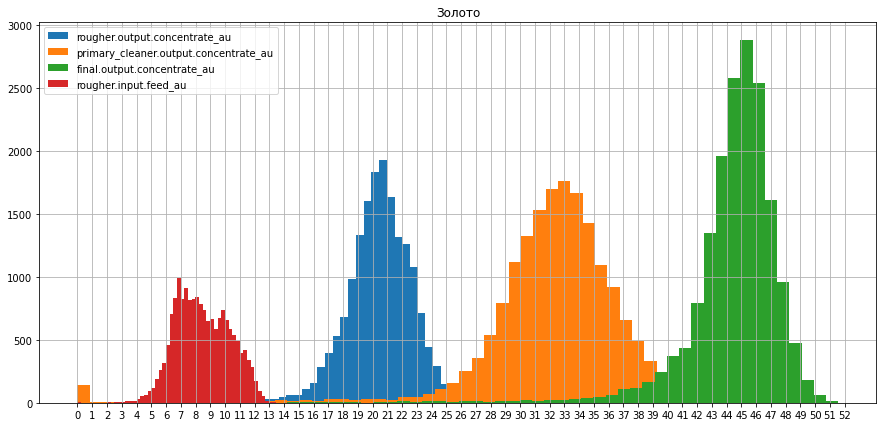

In [15]:
fig, ax = plt.subplots(figsize = (15, 7))
for column_name in [
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au',
    'rougher.input.feed_au']:
    full_data.hist(
        ax=ax,
        bins=55,
        column=column_name,
        legend=True
    )
ax.set_title('Золото');
ax.set_xticks([i for i in range(53)]);

Концентрат золота с каждым этапом очистки становится всё больше, так как именно его получают из руды.

Далее рассмотрю серебро

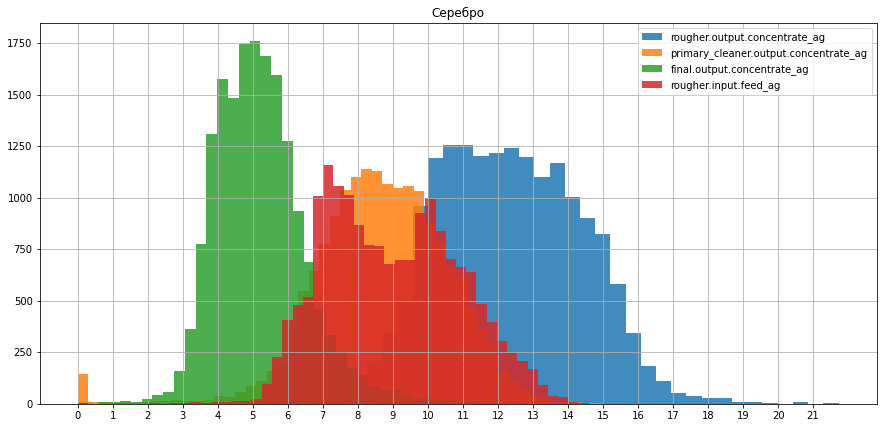

In [16]:
fig, ax = plt.subplots(figsize = (15, 7))
for column_name in [
    'rougher.output.concentrate_ag',
    'primary_cleaner.output.concentrate_ag',
    'final.output.concentrate_ag',
    'rougher.input.feed_ag'
]:
    full_data.hist(
        ax=ax,
        bins=50,
        column=column_name,
        legend=True,
        alpha=0.85
    )
ax.set_title('Серебро');
ax.set_xticks([i for i in range(22)]);

Серебра наоборот с каждым разом становится всё меньше и меньше.

Далее рассматриваю свинец.

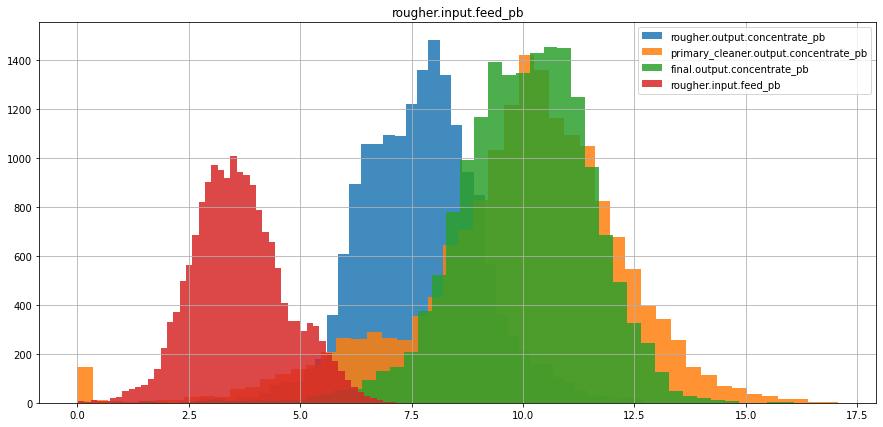

In [17]:
fig, ax = plt.subplots(figsize = (15, 7))
for column_name in [
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_pb',
    'rougher.input.feed_pb'
]:
    full_data.hist(
        ax=ax,
        bins=50,
        column=column_name,
        legend=True,
        alpha=0.85
    )
plt.show()
ax.set_title('Свинец');
ax.set_xticks([i for i in range(21)]);

Концентрат свинца увеличивается после флотации, однако далее он находится примерно на том же уровне, на котором остался после флотации.

### Сравнение распределения размеров гранул сырья

Найду столбцы, которые содержат в себе размеры гранул сырья

In [18]:
for i in train_data.columns:
    if 'size' in i:
        print(i)

primary_cleaner.input.feed_size
rougher.input.feed_size


Добавлю все значения в одну таблицу

In [19]:
feed_table = pd.DataFrame(data={
    'train.rougher.input.feed_size':train_data['rougher.input.feed_size'],
    'train.primary_cleaner.input.feed_size':train_data['primary_cleaner.input.feed_size'],
    'test.rougher.input.feed_size':test_data['rougher.input.feed_size'],
    'test.primary_cleaner.input.feed_size':test_data['primary_cleaner.input.feed_size']
})

Далее строю гистограмму для столбцов процесса флотации, чтобы сравнить значения

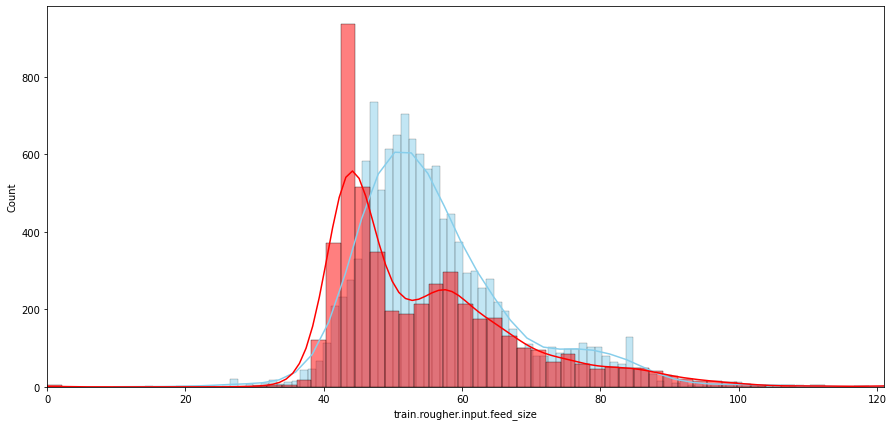

In [20]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.histplot(data=feed_table, ax=ax, x="train.rougher.input.feed_size", color="skyblue", kde=True)
sns.histplot(data=feed_table, ax=ax, x="test.rougher.input.feed_size", color="red", kde=True)
ax.set_xlim(0,121);

На графике видно, что хоть распределение немного отличается, значения находится примерно в одном диалазоне.

Строю следующую гистограмму для столбцов процесса первого этапа очистки, чтобы сравнить значения

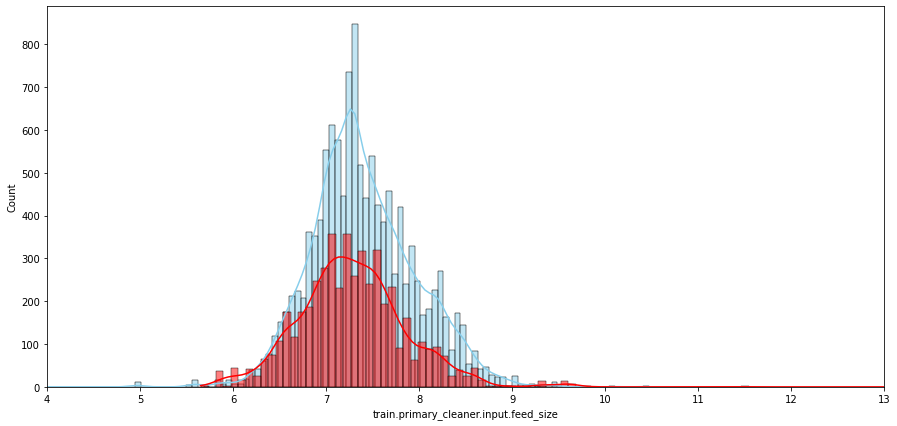

In [21]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.histplot(data=feed_table, ax=ax, x="train.primary_cleaner.input.feed_size", color="skyblue", label="Sepal Length", kde=True)
sns.histplot(data=feed_table, ax=ax, x="test.primary_cleaner.input.feed_size", color="red", label="Sepal Width", kde=True)
ax.set_xlim(4,13);

Опять же разницы между распределением в графиках практически нет, а значит на оценку модели разница в значениях не окажет влияния.

### Исследование суммарной концентрации всех веществ на разных стадиях: сырьё, в черновой и финальный концентраты. 
Нахожу необходимые для исследования столбцы

In [22]:
for i in full_data.columns:
    if 'concentrate' in i:
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au


Строю отдельную таблицу с суммами всех концентратов на разных этапах и строю график

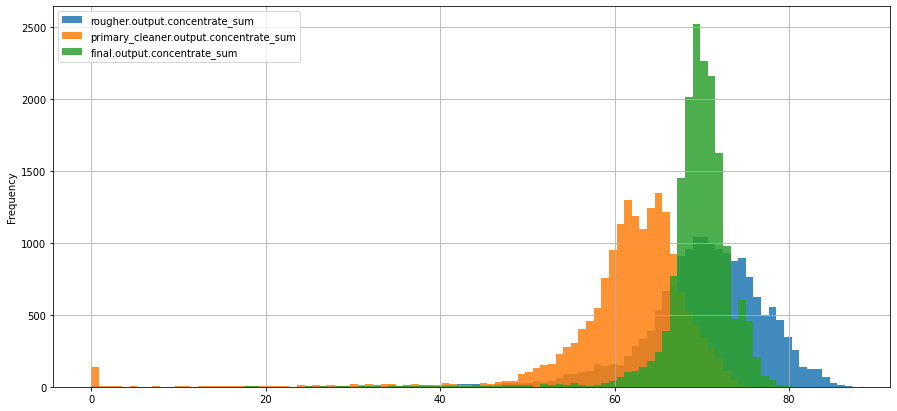

In [23]:
concentrate_table = pd.DataFrame(data={
    'rougher.output.concentrate_sum':(
        full_data['rougher.output.concentrate_ag'] + 
        full_data['rougher.output.concentrate_pb'] + 
        full_data['rougher.output.concentrate_sol'] + 
        full_data['rougher.output.concentrate_au']
    ),
    'primary_cleaner.output.concentrate_sum':(
        full_data['primary_cleaner.output.concentrate_ag'] + 
        full_data['primary_cleaner.output.concentrate_pb'] + 
        full_data['primary_cleaner.output.concentrate_sol'] + 
        full_data['primary_cleaner.output.concentrate_au']
    ),
    'final.output.concentrate_sum':(
        full_data['final.output.concentrate_ag'] + 
        full_data['final.output.concentrate_pb'] + 
        full_data['final.output.concentrate_sol'] + 
        full_data['final.output.concentrate_au']
    )
})
concentrate_table.plot(kind='hist', bins=100, figsize=(15,7), alpha=0.85, grid=True);

На графике видно, что на этапе флотации в сумме концентратов больше, чем на других этапах. После первого этапа очистки сумма значительно уменьшается. А финальная сумма концентратов примерно на том же уровне, что и в процессе флотации, однако распределение у финальной суммы концентратов ниже.

Отдельно вывожу суммарную концентрацию по исходному сырью

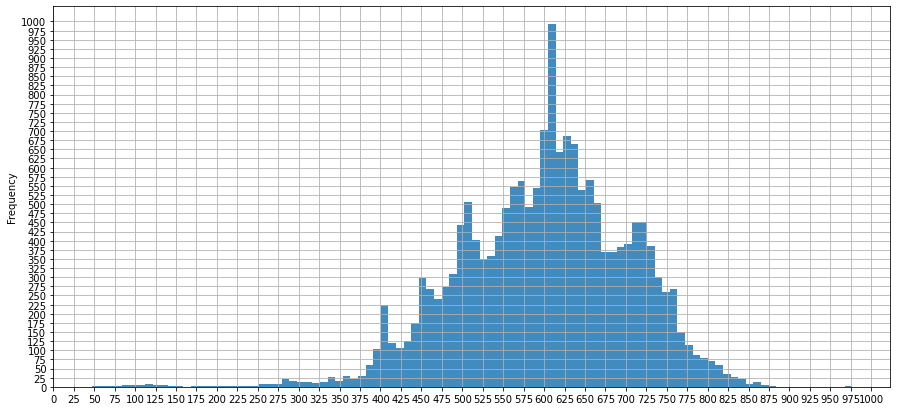

In [24]:
(full_data['rougher.input.feed_ag'] +
full_data['rougher.input.feed_pb'] +
full_data['rougher.input.feed_rate'] +
full_data['rougher.input.feed_size'] +
full_data['rougher.input.feed_sol'] +
full_data['rougher.input.feed_au']).plot(
    kind='hist',
    bins=100,
    figsize=(15,7),
    alpha=0.85,
    grid=True,
    xticks=[i for i in range(0, 1001, 25)],
    yticks=[i for i in range(0, 1001, 25)]
);

Пользуясь этими графиками, удаляю аномальные значения из тренировочной выборки

In [25]:
train_data_rougher_input_sum = (train_data['rougher.input.feed_ag'] +
train_data['rougher.input.feed_pb'] +
train_data['rougher.input.feed_rate'] +
train_data['rougher.input.feed_size'] +
train_data['rougher.input.feed_sol'] +
train_data['rougher.input.feed_au'])
train_data = train_data[(train_data_rougher_input_sum > 250) & (train_data_rougher_input_sum < 875)]

train_data_concentrate_table = pd.DataFrame(data={
    'rougher.output.concentrate_sum':(
        train_data['rougher.output.concentrate_ag'] + 
        train_data['rougher.output.concentrate_pb'] + 
        train_data['rougher.output.concentrate_sol'] + 
        train_data['rougher.output.concentrate_au']
    ),
    'primary_cleaner.output.concentrate_sum':(
        train_data['primary_cleaner.output.concentrate_ag'] + 
        train_data['primary_cleaner.output.concentrate_pb'] + 
        train_data['primary_cleaner.output.concentrate_sol'] + 
        train_data['primary_cleaner.output.concentrate_au']
    ),
    'final.output.concentrate_sum':(
        train_data['final.output.concentrate_ag'] + 
        train_data['final.output.concentrate_pb'] + 
        train_data['final.output.concentrate_sol'] + 
        train_data['final.output.concentrate_au']
    )
})
train_data = train_data[~(
    (train_data_concentrate_table['rougher.output.concentrate_sum'] < 20) |
    (train_data_concentrate_table['primary_cleaner.output.concentrate_sum'] < 20) |
    (train_data_concentrate_table['final.output.concentrate_sum'] < 20)
)]


**Вывод раздела.** В данном разделе изучено изменение концентрации металлов на разных этапах очистки, проведено сравнение распределения размеров сырья на разных этапах очистки и исследована суммарная концентрация всех веществ на разных стадиях очистки и удалены аномальные значения из тренировачных данных.

## Модель

### Функция для вычисления sMAPE
Метрика sMAPE вычисляется следующим образом:

<img src='https://pictures.s3.yandex.net/resources/smape_1576238825.jpg'>

Пользуясь этой формулой, пишу функцию для вычисления sMAPE

In [26]:
def sMAPE(target, predictions):
    return (1 / len(target)) * sum(abs(target - predictions) / ((abs(target) + abs(predictions)) / 2)) * 100

Также необходима функция для вычисления итогового sMAPE. Она вычисляется следующим образом

<img src='https://pictures.s3.yandex.net/resources/_smape_1576238814.jpg'>

Реализую функцию для вычисления итогового sMAPE

In [27]:
def final_sMAPE(target_rougher, predictions_rougher, target_final, predictions_final):
    return 0.25 * sMAPE(target_rougher, predictions_rougher) + 0.75 * sMAPE(target_final, predictions_final)

### Обучение моделей
Отделяю признаки друг от друга

In [28]:
features_train = train_data.drop(columns=['date', 'rougher.output.recovery', 'final.output.recovery'])
target_train = train_data.loc[:, ['rougher.output.recovery', 'final.output.recovery']]
features_test = test_data.drop(columns=['date', 'rougher.output.recovery', 'final.output.recovery'])
target_test = test_data.loc[:, ['rougher.output.recovery', 'final.output.recovery']]

Перебираю модели и гиперпараметры для нахождения наилучшей модели для обоих целевых признаков

In [29]:
# Создаю свою метрику
sMAPE_scorer = make_scorer(sMAPE)
# Переменные для хранения параметров наилучшей модели
best_score = {}
best_model = {}
best_model_title = {}
# Цикл для перебора обоих целевых признаков
for column_name in ['rougher.output.recovery', 'final.output.recovery']:
    # Начинаю с оценки линейной регрессии, так как она не требует перебора гиперпараметров
    model = LinearRegression()
    # Оцениваю модели с помощью среднего значения кросс-валидации. Делю выборку на 5 частей.
    # Сохраняю оценку, как лучшую, так как это первая модель
    best_score[column_name] = cross_val_score(
        model, features_train, target_train[column_name], cv=5, scoring=sMAPE_scorer
    ).mean()
    best_model[column_name] = model
    best_model_title[column_name] = 'LinearRegression'
    # Дерево решений
    best_depth = 0
    best_samples_leaf = 0
    best_decision_tree = 100
    local_features_train, local_features_valid, local_target_train, local_target_valid = train_test_split(
        features_train, target_train[column_name], test_size=0.2, random_state=1
    )
    # Цикл для перебора гиперпараметров модели дерева решений
    for depth in tqdm(range(1, 31), desc='DecisionTreeRegressor (max_depth)', position=0, leave=False):
        for samples_leaf in tqdm(range(1, 51), desc='DecisionTreeRegressor (samples_leaf)', position=1, leave=False):
            model = DecisionTreeRegressor(min_samples_leaf=samples_leaf, max_depth=depth, random_state=1)
            model.fit(local_features_train, local_target_train)
            score = sMAPE(local_target_valid, model.predict(local_features_valid))
            if best_decision_tree > score:
                best_samples_leaf = samples_leaf
                best_depth = depth
                best_decision_tree = score
    # После сравнения моделей дерева решений между собой лучшая сравнивается с остальными
    model = DecisionTreeRegressor(min_samples_leaf=best_samples_leaf, max_depth=best_depth, random_state=1)
    score = cross_val_score(
        model, features_train, target_train[column_name], cv=5, scoring=sMAPE_scorer
    ).mean()
    if best_score[column_name] > score:
        best_model[column_name] = model
        best_model_title[column_name] = f'DecisionTreeRegressor(min_samples_leaf={best_samples_leaf}, max_depth={depth})'
        best_score[column_name] = score
    # Случайный лес
    best_depth = 0
    best_est = 0
    best_random_forest = 100
    # Цикл для перебора гиперпараметров модели случайного леса
    for depth in tqdm(range(1, 21), desc='RandomForestRegressor (max_depth)', position=0, leave=False):
        for est in tqdm(range(1, 51), desc='RandomForestRegressor (n_estimators)', position=1, leave=False):
            model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=1)
            model.fit(local_features_train, local_target_train)
            score = sMAPE(local_target_valid, model.predict(local_features_valid))
            if best_random_forest > score:
                best_est = est
                best_depth = depth
                best_random_forest = score
    # После сравнения моделей случайного леса между собой лучшая сравнивается с остальными
    model = RandomForestRegressor(n_estimators=best_est, max_depth=best_depth, random_state=1)
    score = cross_val_score(
        model, features_train, target_train[column_name], cv=5, scoring=sMAPE_scorer
    ).mean()
    if best_score[column_name] > score:
        best_model[column_name] = model
        best_model_title[column_name] = f'RandomForestRegressor(n_estimators={best_est}, max_depth={depth})'
        best_score[column_name] = score
    
    # Вывод лучшей модели и её параметров для целевого признака
    print(f'Лучшая модель для {column_name}: {best_model_title[column_name]}')
    print(f'sMAPE: {best_score[column_name]}')

DecisionTreeRegressor (max_depth):   0%|          | 0/30 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (max_depth):   0%|          | 0/20 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

Лучшая модель для rougher.output.recovery: RandomForestRegressor(n_estimators=50, max_depth=20)
sMAPE: 0.7072128394694849


DecisionTreeRegressor (max_depth):   0%|          | 0/30 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

DecisionTreeRegressor (samples_leaf):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (max_depth):   0%|          | 0/20 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

RandomForestRegressor (n_estimators):   0%|          | 0/50 [00:00<?, ?it/s]

Лучшая модель для final.output.recovery: RandomForestRegressor(n_estimators=49, max_depth=20)
sMAPE: 0.8045551791524407


Перед тем, как узнать результат метрики на тестовой выборке, посмотрю, что выдаст Dummy модель, чтобы сравнение было более явным

In [30]:
for strategy in ['mean', 'median']:
    dummy_model = DummyRegressor(strategy=strategy)
    dummy_model.fit(features_train, target_train)
    predict = dummy_model.predict(features_test)
    print(f'DummyRegressor(strategy={strategy}) sMAPE: ', end='')
    print(final_sMAPE(
        target_test['rougher.output.recovery'],
        predict[:, 0],
        target_test['final.output.recovery'],
        predict[:, 1]
    ))

DummyRegressor(strategy=mean) sMAPE:7.417961191573438
DummyRegressor(strategy=median) sMAPE:7.152603082550686


Лучшая оценка примитивной модели - `7.15%`.

Проверяю лучшие модели на тестовой выборке

In [31]:
# Обучаю лучшую модель
best_model['rougher.output.recovery'].fit(features_train, target_train['rougher.output.recovery'])
best_model['final.output.recovery'].fit(features_train, target_train['final.output.recovery'])
# Вывожу финальную оценку модели
final_sMAPE(
    target_test['rougher.output.recovery'],
    best_model['rougher.output.recovery'].predict(features_test),
    target_test['final.output.recovery'],
    best_model['final.output.recovery'].predict(features_test)
)

0.9694418091423447

Оценка модели на тестовых данных - `0.97%`. Такая оценка в 7 раз лучше примитивной модели. Модель обучена.

**Вывод раздела.** В данном разделе были написаны функции для вычисления sMAPE, созданы метрики, с применением кросс-валидации и перебором гиперпараметров была найдена лучшая модель и обучена на тренировачных  данных. Обученная модель проверена на тестовых данных и её оценка составляет `0.97%`.

**Вывод.** В данной работе были взяты данные из золотодобывающей отрасли. Целью было создать модель, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды. В ходе работы были выполнены следующие задачи:
+ изучены представленные данные;
+ проверены рассчёты эффективности обогащения;
+ проверена разница в признаках тренировачной и тестовой выборках;
+ предобработаны данные;
+ изучено изменение концентрации металлов на разных этапах очистки;
+ проведено сравнение распределения размеров сырья на разных этапах очистки;
+ исследована суммарная концентрация всех веществ на разных стадиях очистки;
+ написаны функции для вычисления sMAPE и итогового sMAPE;
+ выделены признаки и целевой признак;
+ найдены лучшие модели для целевых признаков;
+ лучшие модели обучены;
+ лучшие модели проверены итоговой метрикой на тестовой выборке.

Главная цель проекта была выполнена. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.